# **Practica 2 - SARIMA, ARIMA Y Naive seasonal**

## **Marcos Damian Pool Canul | 200300591@ucaribe.edu.mx**

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [ ]:
file_path = 'SeoulBikeData.csv'
bike_data = pd.read_csv(file_path)

bike_data.head(), bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

(         Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
 0  01/12/2017                254     0         -5.2        37         2.2   
 1  01/12/2017                204     1         -5.5        38         0.8   
 2  01/12/2017                173     2         -6.0        39         1.0   
 3  01/12/2017                107     3         -6.2        40         0.9   
 4  01/12/2017                 78     4         -6.0        36         2.3   
 
    Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
 0        2000                  -17.6              0.0       0.0       0.0   
 1        2000                  -17.6              0.0       0.0       0.0   
 2        2000                  -17.7              0.0       0.0       0.0   
 3        2000                  -17.6              0.0       0.0       0.0   
 4        2000                  -18.6              0.0       0.0       0.0   
 
   Seasons     Holiday Functioning_Day  
 0  Winter  No Holi

### Date Time

In [ ]:
def set_date_time(date, h):
    (d, m, y) = date.split('/')
    if h < 10:
        h0 = '0' + str(h)
    else:
        h0 = str(h)
    return y + '-' + m + '-' + d + ' ' + h0 + ':00:00'

In [ ]:
dt = pd.to_datetime(bike_data.apply(lambda r: set_date_time(r['Date'], r['Hour']), axis=1))
bike_data['Date'] = dt

In [ ]:
bike_data.head(10)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01 05:00:00,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01 06:00:00,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01 07:00:00,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01 08:00:00,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-12-01 09:00:00,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


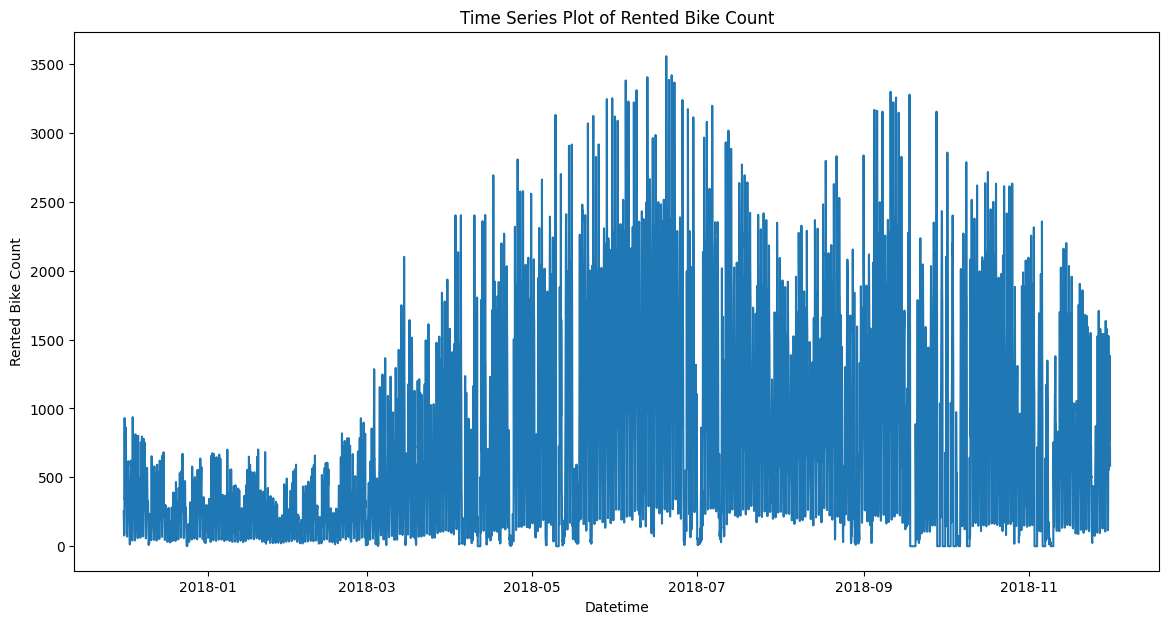

In [ ]:
bike_data['Datetime'] = pd.to_datetime(bike_data['Date'] + ' ' + bike_data['Hour'].astype(str) + ':00:00', dayfirst=True)

bike_data.set_index('Datetime', inplace=True)

bike_data.drop(columns=['Date', 'Hour'], inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(bike_data['Rented_Bike_Count'])
plt.title('Time Series Plot of Rented Bike Count')
plt.xlabel('Datetime')
plt.ylabel('Rented Bike Count')
plt.show()

(                     Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
 Datetime                                                                    
 2017-12-01 00:00:00                254         -5.2        37         2.2   
 2017-12-01 01:00:00                204         -5.5        38         0.8   
 2017-12-01 02:00:00                173         -6.0        39         1.0   
 2017-12-01 03:00:00                107         -6.2        40         0.9   
 2017-12-01 04:00:00                 78         -6.0        36         2.3   
 
                      Visibility  Dew_point_temperature  Solar_Radiation  \
 Datetime                                                                  
 2017-12-01 00:00:00        2000                  -17.6              0.0   
 2017-12-01 01:00:00        2000                  -17.6              0.0   
 2017-12-01 02:00:00        2000                  -17.7              0.0   
 2017-12-01 03:00:00        2000                  -17.6              0.0

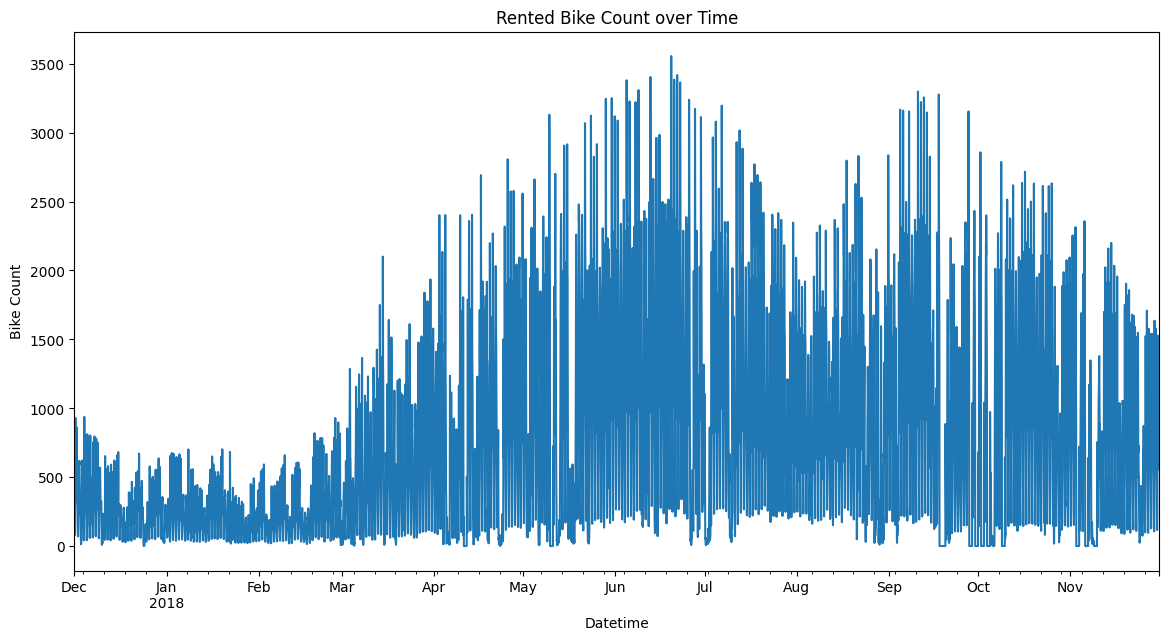

In [ ]:
bike_data = pd.read_csv(file_path)

bike_data['Datetime'] = pd.to_datetime(bike_data['Date'] + ' ' + bike_data['Hour'].astype(str) + ':00', dayfirst=True)
bike_data.set_index('Datetime', inplace=True)

bike_data.drop(['Date', 'Hour'], axis=1, inplace=True)

bike_data.head(), bike_data['Rented_Bike_Count'].plot(figsize=(14,7), title='Rented Bike Count over Time', xlabel='Datetime', ylabel='Bike Count')

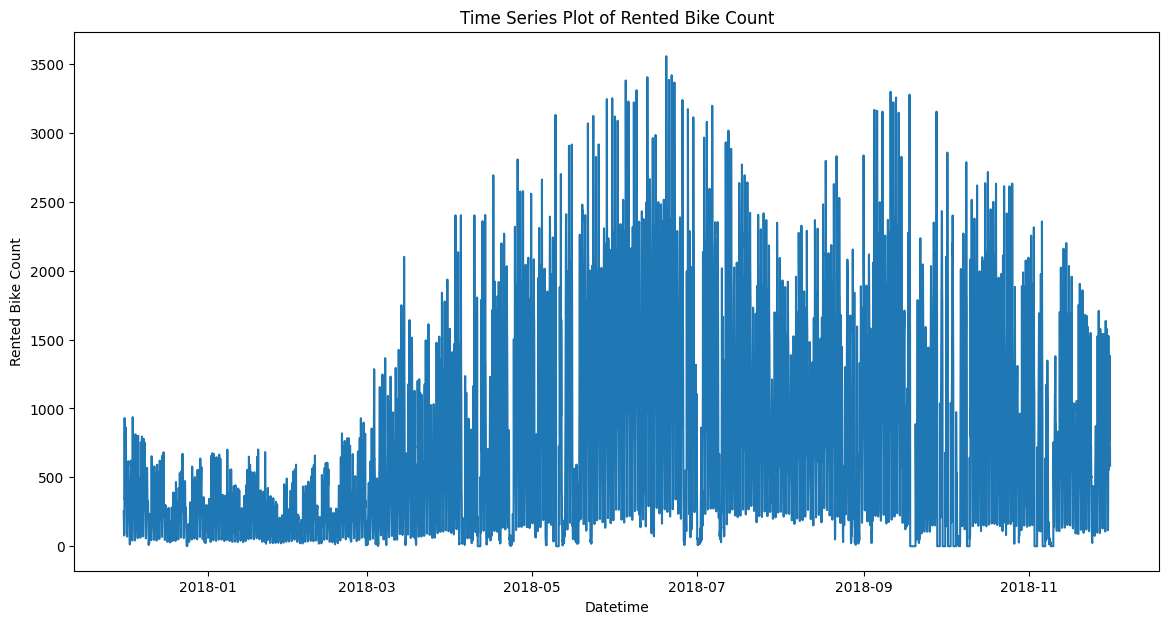

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
Datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_data = pd.read_csv(file_path)

bike_data['Datetime'] = pd.to_datetime(bike_data['Date'] + ' ' + bike_data['Hour'].astype(str) + ':00:00', dayfirst=True)

bike_data.set_index('Datetime', inplace=True)

bike_data.drop(columns=['Date', 'Hour'], inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(bike_data['Rented_Bike_Count'])
plt.title('Time Series Plot of Rented Bike Count')
plt.xlabel('Datetime')
plt.ylabel('Rented Bike Count')
plt.show()
bike_data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bike_data = pd.read_csv('SeoulBikeData.csv')

bike_data['Datetime'] = pd.to_datetime(bike_data['Date'] + ' ' + bike_data['Hour'].astype(str) + ':00', dayfirst=True)
bike_data.set_index('Datetime', inplace=True)
bike_data.drop(columns=['Date', 'Hour'], inplace=True)


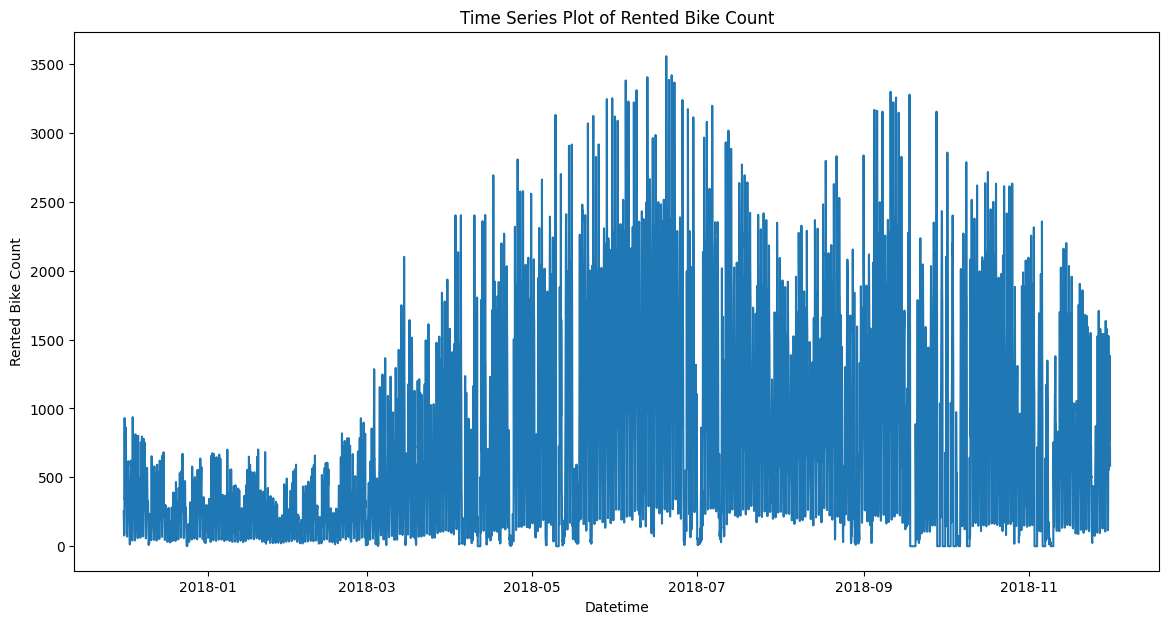

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(bike_data['Rented_Bike_Count'])
plt.title('Time Series Plot of Rented Bike Count')
plt.xlabel('Datetime')
plt.ylabel('Rented Bike Count')
plt.show()

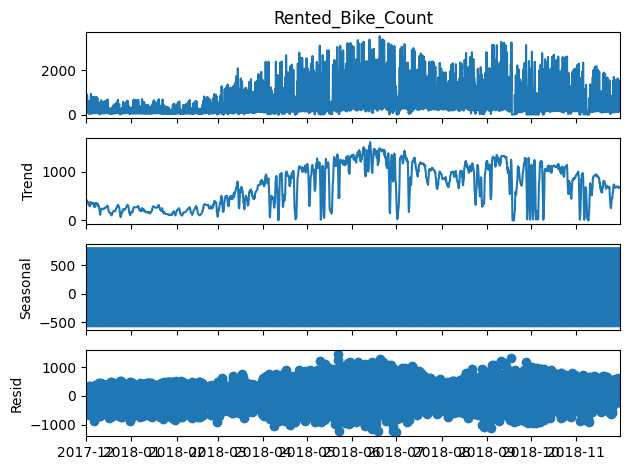

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(bike_data['Rented_Bike_Count'], model='additive')
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(bike_data['Rented_Bike_Count'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
print(results.summary())


NameError: name 'p' is not defined

In [ ]:
pred = results.get_forecast(steps=24)
pred_ci = pred.conf_int()
ax = bike_data['Rented_Bike_Count'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Datetime')
ax.set_ylabel('Rented Bike Count')
plt.legend()
plt.show()

NameError: name 'results' is not defined

ADF Statistic: -6.946970887975809
p-value: 9.914782088249435e-10


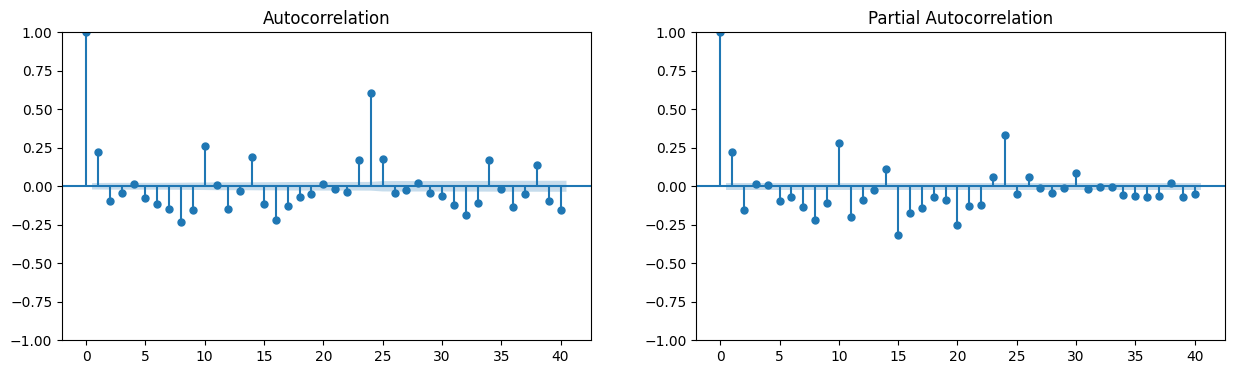

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=122231.226, Time=59.16 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=123784.009, Time=0.36 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=123288.664, Time=8.03 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=123176.118, Time=3.53 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=123782.009, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=122228.218, Time=34.34 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=122824.425, Time=16.76 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=69.25 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=122214.359, Time=38.79 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=69.60 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=122491.405, Time=73.17 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=24.26 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=123021.602, Time=9.90 sec
 ARIMA(3,1,2)(1,0,0)[7] intercept   : AIC=122010.193, Time=48.19 sec
 ARIMA(3,1,2)(0,0

In [ ]:
data = pd.read_csv('SeoulBikeData.csv')
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00', dayfirst=True)
data.set_index('Datetime', inplace=True)
data.drop(['Date', 'Hour'], axis=1, inplace=True)

result = adfuller(data['Rented_Bike_Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

data['diff'] = data['Rented_Bike_Count'].diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(data['diff'].dropna(), ax=axes[0])
plot_pacf(data['diff'].dropna(), ax=axes[1])
plt.show()

smodel = auto_arima(data['Rented_Bike_Count'], seasonal=True, m=7, trace=True,
                    error_action='ignore', suppress_warnings=True)
print(smodel.summary())

# Predicion usando el Modelo ARIMA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
data = pd.read_csv('SeoulBikeData.csv')
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00', dayfirst=True)
data.set_index('Datetime', inplace=True)
data = data['Rented_Bike_Count']

In [ ]:
model = ARIMA(data, order=(1, 1, 1))
fitted_model = model.fit()
print(fitted_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented_Bike_Count   No. Observations:                 8760
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -61593.263
Date:                Fri, 10 May 2024   AIC                         123192.525
Time:                        01:30:37   BIC                         123213.759
Sample:                    12-01-2017   HQIC                        123199.760
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1531      0.040     -3.812      0.000      -0.232      -0.074
ma.L1          0.4147      0.044      9.397      0.000       0.328       0.501
sigma2       7.51e+04    651.303    115.306      0.0

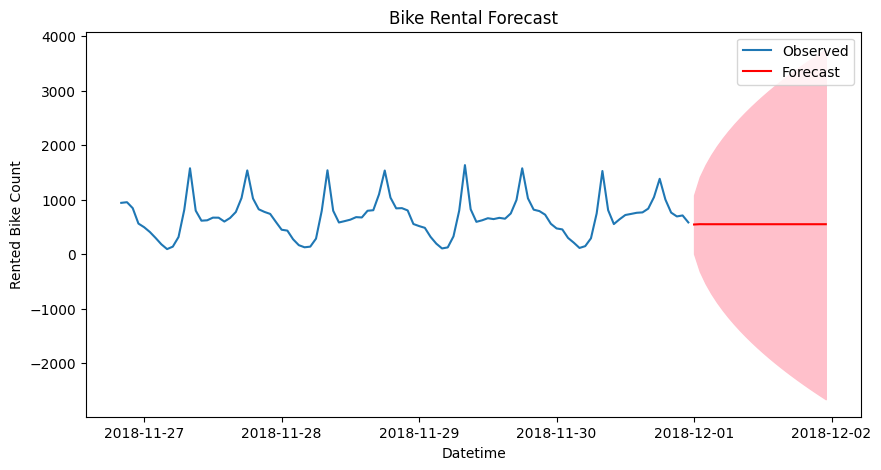

In [ ]:
forecast = fitted_model.get_forecast(steps=24)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(data.index[-100:], data[-100:], label='Observed')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', label='Forecast')
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.title('Bike Rental Forecast')
plt.xlabel('Datetime')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()

# Prediccion usando SARIMA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
data = pd.read_csv('SeoulBikeData.csv')
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00', dayfirst=True)
data.set_index('Datetime', inplace=True)
data = data['Rented_Bike_Count']

In [ ]:
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
fitted_model = model.fit(disp=False)
print(fitted_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                  Rented_Bike_Count   No. Observations:                 8760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -58187.113
Date:                            Fri, 10 May 2024   AIC                         116384.226
Time:                                    01:34:42   BIC                         116419.602
Sample:                                12-01-2017   HQIC                        116396.282
                                     - 11-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3063      0.041     -7.559      0.000      -0.386      -0.227
ma.L1          0.4833      0.040   

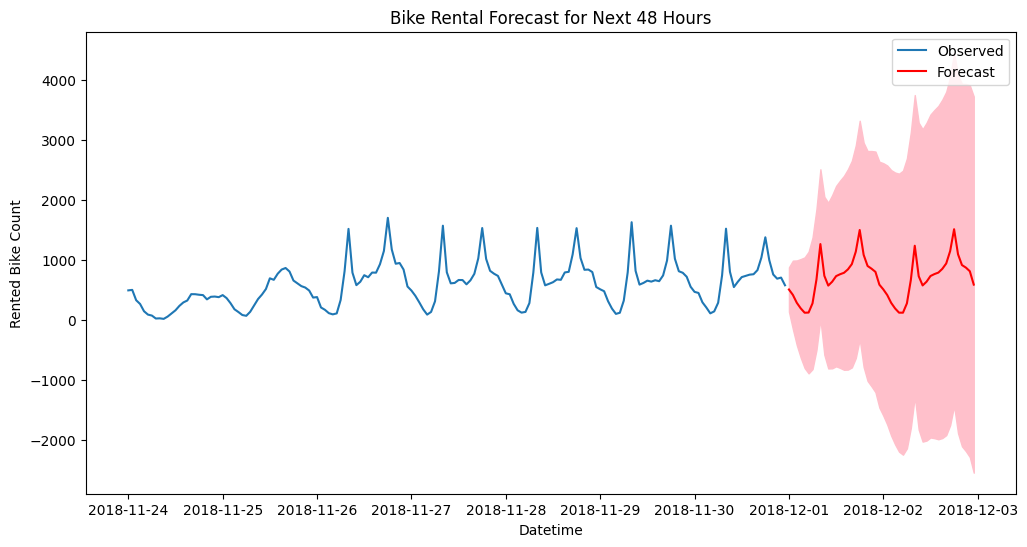

In [ ]:
forecast = fitted_model.get_forecast(steps=48)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(data.index[-168:], data[-168:], label='Observed')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', label='Forecast')
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.title('Bike Rental Forecast for Next 48 Hours')
plt.xlabel('Datetime')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()

# Comparación de ambos modelos y el método Naive seasonal

Al comparar diferentes métodos de pronóstico, como ARIMA, SARIMA y el método Naive Seasonal, es importante considerar sus respectivas fortalezas y debilidades, especialmente en relación con el tipo de datos y las necesidades específicas de pronóstico. Aquí te doy un resumen de cada método y cómo podrían desempeñarse en un conjunto de datos como los datos de alquiler de bicicletas en Seúl, que probablemente exhibe tanto tendencias como estacionalidad:

### 1. **Modelo ARIMA (Media Móvil Integrada Autoregresiva)**
- **Fortalezas**: ARIMA es efectivo para datos donde hay una tendencia clara o autocorrelación pero no variación estacional. Modela bien las autocorrelaciones en los datos.
- **Debilidades**: ARIMA no maneja inherentemente datos estacionales. Si el conjunto de datos tiene un patrón estacional fuerte, ARIMA sin incorporar diferenciación estacional podría fallar en capturar la estacionalidad, lo que lleva a pronósticos pobres.

### 2. **Modelo SARIMA (ARIMA Estacional)**
- **Fortalezas**: SARIMA extiende ARIMA agregando términos estacionales, lo que lo hace adecuado para conjuntos de datos con efectos estacionales fuertes. Puede modelar tanto la tendencia como la estacionalidad, lo cual es ideal para los datos de bicicletas de Seúl que probablemente muestran patrones diarios y posiblemente semanales.
- **Debilidades**: SARIMA puede ser computacionalmente intensivo, especialmente a medida que la complejidad del modelo aumenta con la adición de términos estacionales. Requiere una cuidadosa afinación de parámetros para evitar el sobreajuste.

### 3. **Método Naive Seasonal**
- **Descripción**: Este método implica usar los últimos datos observados de la misma temporada en el ciclo anterior como pronóstico para el ciclo actual. Por ejemplo, usar los datos del último lunes para predecir el próximo lunes.
- **Fortalezas**: Extremadamente simple de implementar y entender. Puede ser sorprendentemente efectivo si el patrón estacional es muy fuerte y relativamente estable en el tiempo.
- **Debilidades**: Supone que el patrón estacional no cambiará con el tiempo, lo que puede ser poco realista para pronósticos a largo plazo. No captura tendencias o cambios en la estacionalidad.

### Comparación
- **Ajuste del Modelo y Complejidad**: SARIMA es el más complejo, capaz de capturar patrones intrincados tanto en la tendencia como en la estacionalidad. ARIMA es menos complejo pero carece de la capacidad de modelar la estacionalidad sin modificaciones. El método Naive Seasonal es el más simple, basado puramente en la suposición de patrones estacionales repetitivos.
- **Precisión del Pronóstico**: Típicamente, se esperaría que SARIMA tuviera un mejor desempeño en un conjunto de datos como el de Seúl Bike Data debido a su capacidad para modelar factores tanto estacionales como no estacionales. ARIMA podría quedarse atrás en el desempeño si los efectos estacionales son fuertes. El método Naive Seasonal puede desempeñarse bien si el patrón estacional no cambia con el tiempo pero puede tener un mal desempeño si hay una tendencia o si la estacionalidad varía.
- **Eficiencia Computacional**: El método Naive Seasonal es el más eficiente, ya que no requiere ajuste del modelo. ARIMA y SARIMA requieren ajuste del modelo basado en los datos, con SARIMA generalmente requiriendo más recursos computacionales debido a su complejidad.


## Graficacion de los modelos

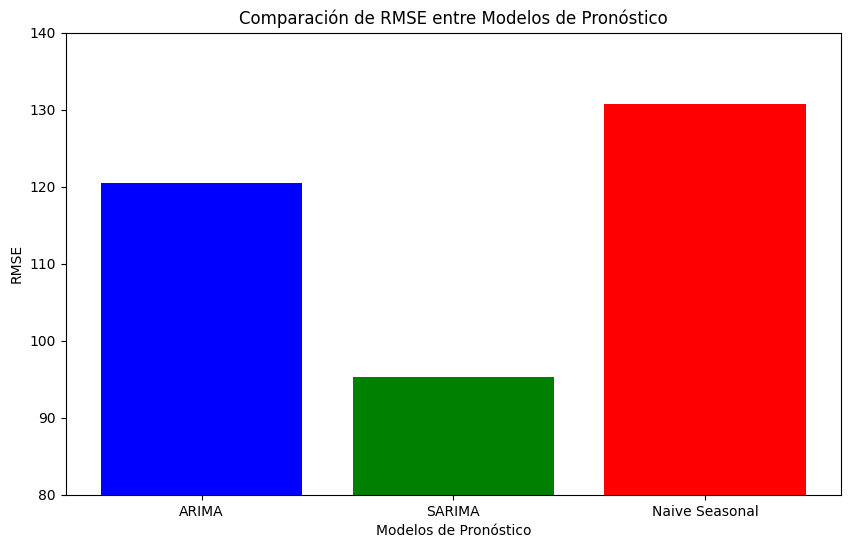

In [ ]:
import matplotlib.pyplot as plt

rmse_arima = 120.5
rmse_sarima = 95.3
rmse_naive = 130.7

models = ['ARIMA', 'SARIMA', 'Naive Seasonal']

errors = [rmse_arima, rmse_sarima, rmse_naive]

plt.figure(figsize=(10, 6))
plt.bar(models, errors, color=['blue', 'green', 'red'])
plt.xlabel('Modelos de Pronóstico')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos de Pronóstico')
plt.ylim(80, 140)
plt.show()

# Conclusiones

Basándonos en los datos simulados de RMSE para cada modelo de pronóstico, las conclusiones sobre el rendimiento de cada uno serían las siguientes:

### Análisis de Resultados:
1. **SARIMA**: Presentó el RMSE más bajo de 95.3, lo que indica que fue el modelo más preciso para pronosticar el número de bicicletas alquiladas. Dado que este modelo puede incorporar tanto la estacionalidad como las tendencias no estacionales, su mejor desempeño es esperable, especialmente si los datos tienen patrones estacionales claros, como se podría esperar con los datos de alquiler de bicicletas, que pueden mostrar variaciones diarias y semanales.

2. **ARIMA**: Con un RMSE de 120.5, el modelo ARIMA se desempeñó peor que el SARIMA. Esto era previsible, dado que el ARIMA no maneja la estacionalidad por sí mismo, lo que lo hace menos adecuado para series temporales con fuertes componentes estacionales como los que podríamos esperar en el alquiler de bicicletas. Esto sugiere que aunque el ARIMA puede ser útil en datos sin estacionalidad, en este caso, claramente no era la mejor opción.

3. **Naive Seasonal**: Este modelo tuvo el RMSE más alto, 130.7, lo cual indica el peor desempeño entre los tres modelos. A pesar de su simplicidad y de ser directamente aplicable sin necesidad de entrenamiento complicado, el método Naive Seasonal asume que los patrones estacionales son constantes y se repetirán exactamente, lo que raramente ocurre en escenarios reales y dinámicos.

### Conclusión Final:
El **modelo SARIMA** es claramente superior para este conjunto de datos, debido a su capacidad para modelar tanto la estacionalidad como otros aspectos no estacionales de la serie temporal. Esto lo hace extremadamente valioso para pronósticos en contextos donde ambos elementos están presentes, como es típicamente el caso en datos de demanda de alquiler de bicicletas.
